<a href="https://colab.research.google.com/github/hilalusta1/machine-learning-homeprice-prediction/blob/main/machine_learning_homeprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DRİVE BAĞLANTISI VE VERİ SETİNİN ÇEKİLMESİ:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['VERİSETİ_CONFIG_DIR'] = "/content/drive/My Drive/veriSeti"
%cd /content/drive/My Drive/veriSeti
!ls

Mounted at /content/drive
/content/drive/My Drive/veriSeti
housing.csv  model.pkl


In [ ]:
#PANDAS KÜTÜPHANESİ YARDIMIYLA VERİ SETİNİN VARSAYILAN OLARAK İLK 5 SATIRININ GÖRÜNTÜLENMESİ:
import pandas as pd

veri = pd.read_csv("housing.csv")
veri.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#SÜTUNLARIN İSİMLERİNİN TÜRKÇELEŞTİRİLMESİ İŞLEMİNİ VERİ.COLUMNS İLE SÜTUN İSİMLERİNİ TUTAN BİR DİZİ ÜZERİNDEN, ELEMANLARIN TEK TEK DEĞİŞTİRİLMESİ İLE TÜRKÇELEŞTİRME İŞLEMİ GERÇEKLEŞTİRİLİYOR:
veri.columns = ['Boylam' if x=='longitude' else x for x in veri.columns]
veri.columns = ['Enlem' if x=='latitude' else x for x in veri.columns]
veri.columns = ['Konut_Ortalama_Yas' if x=='housing_median_age' else x for x in veri.columns]
veri.columns = ['Toplam_Oda' if x=='total_rooms' else x for x in veri.columns]
veri.columns = ['Toplam_Yatak_Odası' if x=='total_bedrooms' else x for x in veri.columns]
veri.columns = ['Nüfus' if x=='population' else x for x in veri.columns]
veri.columns = ['Hane_Sayisi' if x=='households' else x for x in veri.columns]
veri.columns = ['Ortalama_Gelir' if x=='median_income' else x for x in veri.columns]
veri.columns = ['Ortalama_Fiyat' if x=='median_house_value' else x for x in veri.columns]
veri.columns = ['Okyanusa_Yakınlık' if x=='ocean_proximity' else x for x in veri.columns]
veri.head()

,Boylam,Enlem,Konut_Ortalama_Yas,Toplam_Oda,Toplam_Yatak_Odası,Nüfus,Hane_Sayisi,Ortalama_Gelir,Ortalama_Fiyat,Okyanusa_Yakınlık
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#İNFO İLE VERİ SETİ HAKKINDAKİ BİLGİLERİ YAZDIRDIK:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Boylam              20640 non-null  float64
 1   Enlem               20640 non-null  float64
 2   Konut_Ortalama_Yas  20640 non-null  float64
 3   Toplam_Oda          20640 non-null  float64
 4   Toplam_Yatak_Odası  20433 non-null  float64
 5   Nüfus               20640 non-null  float64
 6   Hane_Sayisi         20640 non-null  float64
 7   Ortalama_Gelir      20640 non-null  float64
 8   Ortalama_Fiyat      20640 non-null  float64
 9   Okyanusa_Yakınlık   20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


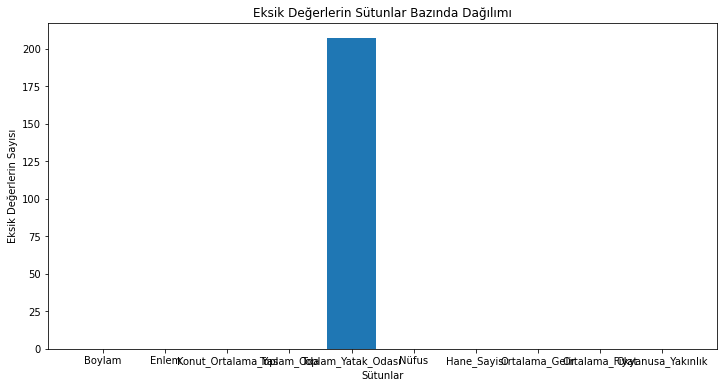

In [ ]:
#VERİ SETİ ÜZERİNDEKİ ESKİK DEĞERLER İÇİN İLK OLARAK İSNULL METODU İLE SÜTUNLARDA TOPLAM KAÇ TANE EKSİK DEĞER OLDUĞUNU HESAPLIYORUZ
#DAHA SONRA MATPLOTLİB KÜTÜPHANESİ YARIDIMIYLA BU EKSİKDEGERLER DEĞİŞKENİNİ GÖRSELLEŞTİRİYORUZ:
import matplotlib.pyplot as plt

eksik_degerler = veri.isnull().sum()
plt.figure(figsize=(12,6))
plt.bar(eksik_degerler.index, eksik_degerler.values)
plt.title("Eksik Değerlerin Sütunlar Bazında Dağılımı")
plt.xlabel("Sütunlar")
plt.ylabel("Eksik Değerlerin Sayısı")
plt.show()

In [ ]:
#EKSİK DEĞER GÖRDÜĞÜMÜZ SÜTUNLARI SCİKİT-LEARN KÜTÜPHANESİNİN SİMPLEİMPUTER SINIFI YARDIMIYLA DOLDURMA İŞLEMİ YAPARKEN, “STRATEGY” PARAMETRESİ İÇERİSİNE "MEAN"
#DEĞERİNİ VEREREK EKSİK DEĞERLERİN SÜTUNDA ORTALAMA DEĞERLE DOLDURMASINI SAĞLIYORUZ. EN SON OLARAKTA İMP NESNESİ ÜZERİNDEN FİT_TRANSFORM YAPILARAK EKSİK DEĞERLERİ DOLDURUYORUZ:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
veri['Toplam_Yatak_Odası'] = imp.fit_transform(veri[['Toplam_Yatak_Odası']])

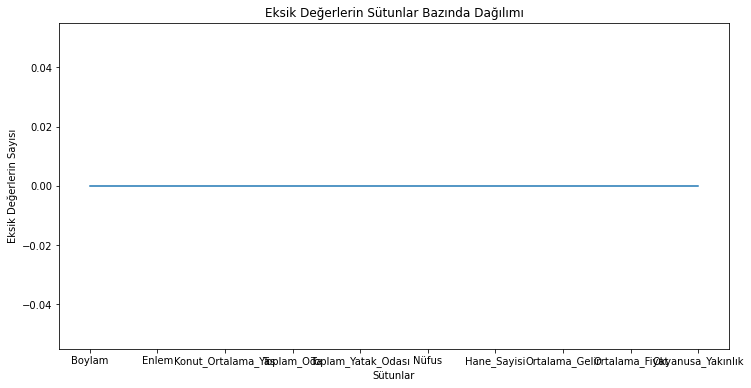

In [ ]:
#TEKRAR EKSİK DEĞERLERİ GÖRSELLEŞTİRİYORUZ VE ARTIK EKSİK DEĞER KALMADIĞINI GÖRÜYORUZ:
eksik_degerler = veri.isnull().sum()

plt.figure(figsize=(12,6))
plt.plot(eksik_degerler.index, eksik_degerler.values)
plt.title("Eksik Değerlerin Sütunlar Bazında Dağılımı")
plt.xlabel("Sütunlar")
plt.ylabel("Eksik Değerlerin Sayısı")
plt.show()

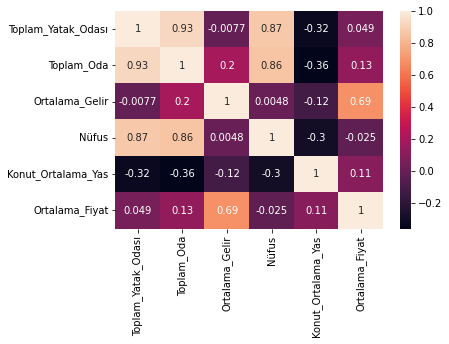

In [ ]:
#VERİ SETİNDE SÜTUNLAR ARASINDAKİ İLİŞKİYİ GÖRSELLEŞTİRMEK İÇİN ISI HARİTASI YÖNTEMİNİ TERCİH ETTİM.
#BU İŞLEM İÇİN SEABORN KÜTÜPHANESİNDE BULUNAN, ALDIĞI PARAMETRELER ARASINDAKİ İLİŞKİYİ GÖSTERMEK İÇİN KULLANILAN HEATMAP() FONKSİYONUNU KULLANIYORUZ:

import matplotlib.pyplot as plt
import seaborn as sns

veri_plot = veri[["Toplam_Yatak_Odası", "Toplam_Oda", "Ortalama_Gelir", "Okyanusa_Yakınlık", "Nüfus", "Konut_Ortalama_Yas", "Ortalama_Fiyat"]]
sns.heatmap(veri_plot.corr(), annot=True)
plt.show()

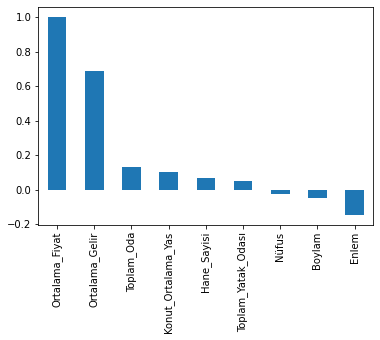

In [ ]:
#ŞİMDİDE ORTALAMA FİYATA EN ÇOK ETKİ EDEN SÜTUNLARIN BULUNMASI İÇİN ETKİ ADINDA BİR DEĞİŞKENE
#VERİ SETİNDEKİ ORTALAMA FİYATA ETKİ EDEN SÜTUNLARIN KORELASYON DEĞERİ ATIYORUZ VE DAHA SONRA ETKİ DEĞİŞKENİ GÖRSELLEŞTİYORUZ:
import matplotlib.pyplot as plt

etki = veri.corr()["Ortalama_Fiyat"].sort_values(ascending=False)
etki.plot(kind="bar")
plt.show()

In [ ]:
#ORTALAMA FİYATA EN ÇOK ETKİ GÖSTEREN SÜTUNLARIN “ORTALAMA_GELİR” VE “ORTALAM_ODA” OLDUĞUNU GÖRDÜK. BU NEDENLE ORTALAMA GELİR VE TOPLAM ODA SÜTUNLARINI KULLANARAK YENİ BİR ÖZELLİK TÜRETEBİLİRİZ.
#BU İŞLEM İÇİN APPLY() VE LAMBDA İFADELERİNE İHTİYACIMIZ VAR, ÇÜNKÜ HESAPLAMA İŞLEMİNİ LAMBDA GERÇEKLEŞTİRİRKEN, BU İŞLEMİN TÜM SATIRLAR İÇİN GERÇEKLEŞMESİNİ İSE APPLY() YAPAR. ORTALAMA GELİRİN
#TOPLAM ODA SAYISINA BÖLÜMÜNÜ ALIP, TÜRETİLMİŞ ÖZELLİK OLARAK ATADIKTAN SONRA TABLOYA EKLİYORUZ:

veri['Türetilmiş_Özellik'] = veri.apply(lambda row: row['Ortalama_Gelir'] / row['Toplam_Oda'], axis=1)
import numpy as np

#ÖNCELİKLE X DEĞİŞKENİNE VERİ SETİNİN BİR KOPYASINI ALDIK BU ŞEKİLDE VERİ SETİNDE DEĞİŞİKLİK YAPABİLİRİZ. DAHA SONRA ORTALAMA_FİYAT SÜTUNUNDA BULUNAN DEĞERLERİN DAĞILIMININ NORMAL DAĞILIMA
#YAKIN OLMASINI İSTEDİĞİMİZ İÇİN ORTALAMA_FİYAT SÜTUNUNDA BULUNAN DEĞERLERİ LOGARİTMİK OLARAK Y DEĞİŞKENİNE ATADIK:
#X DEĞİŞKENİNDE BULUNAN VERİNİN KOPYASI ÜZERİNDEN ORTALAMA FİYAT SÜTUNUNU SİLDİK BU SAYEDE ORTALAMA FİYAT HEDEF DEĞİŞKEN OLARAK KULLANILACAK VE MODELİN FİYAT TAHMİNİN EN DOĞRU ŞEKİLDE VERMESİ SAĞLANACAKTIR

X = veri.copy()
y = np.log(veri['Ortalama_Fiyat'])
del X['Ortalama_Fiyat']

In [ ]:
#VERİ SETİNİN KOPYASINI TUTTUĞUMUZ X DEĞİŞKENİ ÜZERİNDEN SAYISAL SÜTUNLAR İÇİN EĞİLİM DEĞERLERİNİ HESAPLAYIP DAHA SONRA BU DEĞERLERİ “ÖZNİTELİK”,”EĞİM”,”MUTLAKDEGER_EGİM”,”SAPMA_DEGER”
#SÜTUNLARINA SAHİP YENİ BİR VERİ SETİ OLUŞTURUYORUZ. MUTLAKDEGER_EGİM SÜTUNU ÜZERİNDEN KONTROL SAĞLARKEN 0.5’DEN BÜYÜK OLAN VERİİLERİ İŞARETLİYORUZ:
#Veri setimiz üzerinde eğim işlemi yaparak, sütunların normal dağılıma sahip olup olmadığını kontrol ediyoruz.
#Veri setinin normal dağılım göstermesi doğru sonuçlara ulaşabilmemiz açısından önemlidir bu nedenle eğim işlemleri veri setini en doğru hale getirmemizde bize yardımcı olacaktır.

import numpy as np

veri_egimi = {'oznitelik': [], 'egim': [], 'mutlakdeger_egim': [], 'sapma_degeri': []}
for i in X.select_dtypes(np.number).columns:
    egim = X[i].skew()
    veri_egimi['oznitelik'].append(i)
    veri_egimi['egim'].append(egim)
    veri_egimi['mutlakdeger_egim'].append(abs(egim))
    veri_egimi['sapma_degeri'].append(True if abs(egim) > 0.5 else False)
veri_egimi = pd.DataFrame(veri_egimi)

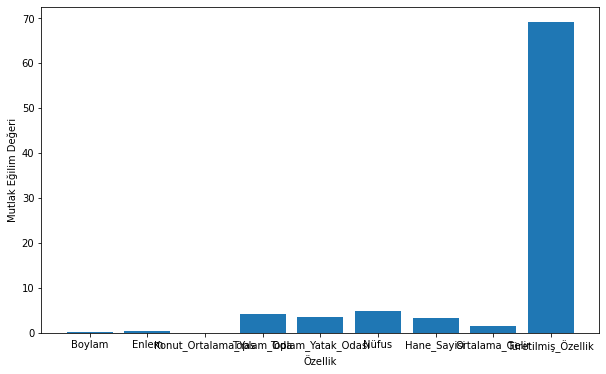

In [ ]:
#YUKARIDA OLUŞTURDUĞUMUZ VERİ SETİNİN ÜZERİNDEN EĞİMLERİ GÖSTEREN BİR BAR GRAFİĞİ ÇİZİYORUZ.
#VERİ_EĞİMİ DEĞİŞKENİNE OZNİTELİK VE MUTLAKDEGER_EGİM SÜTUNLARINI VERİYORUZ VE DAHA SONRA BU SÜTUNLARA GÖRE GÖRSELLEŞTİRME İŞLEMİNİ GERÇEKLEŞTİRİYORUZ:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(veri_egimi['oznitelik'], veri_egimi['mutlakdeger_egim'])
plt.xlabel('Özellik')
plt.ylabel('Mutlak Eğilim Değeri')
plt.show()

In [ ]:
#VERİ_EGİMİ İSİMLİ VERİ SETİNDEKİ SÜTUNLARIN MUTLAKEGİMDEGERİ ÜZERİNDEN KONTROLÜNÜ SAĞLIYORUZ. BU AŞAMADA MUTLAKEGİM_DEGERİ 0.5’DEN BÜYÜK OLANLARI SEÇMEK İÇİN DÖNGÜ
#İLE OZNİTELİK SÜTUNUNU VE MUTLAKEGİM_DEGERİ SÜTUNUNU KULLANIYORUZ. BU KOŞULA UYAN VERİLERİ DÖNGÜ SAYESİNDE SAPMADEGERİYÜKSEK_SÜTUNLAR LİSTESİNE EKLİYORUZ:

sapmadegeriyuksek_sütunlar = []
for i in veri_egimi['oznitelik']:
    if veri_egimi[veri_egimi['oznitelik'] == i]['mutlakdeger_egim'].values[0] > 0.5:
        sapmadegeriyuksek_sütunlar.append(i)

In [ ]:
#SAPMADEGERİYÜKSEK_SÜTUNLAR LİSTENİNDEKİ SÜTUNLARA X VERİ SETİNDE BULUNAN VERİLERLE LOGARİTMİK DÖNÜŞÜM SAĞLIYORUZ BU ŞEKİLDE VERİ SETİNİ NORMAL DAĞILIMA GETİRMEYE ÇALIŞIYORUZ:
for i in sapmadegeriyuksek_sütunlar:
    X[i] = X[i].apply(lambda x: np.log(x))

In [ ]:
#OKYANUSA_YAKINLIK SÜTUNUNUN METİN İÇERMESİNDEN DOLAYI BU SÜTUNDA BULUNAN  VERİLERİN SAYISAL DEĞERE DÖNÜŞTÜRÜLMESİ GEREKİYOR BUNUNDA AMACI MODELLEME İŞLEMİ
#SIRASINDA SAYISAL VERİLERİN DAHA KOLAY İŞLENEBİLİR OLMASIDIR. BU AŞAMADAN SONRA OKYANUSA_YAKINLIK SÜTUNUNDAKİ DEĞERLER 0-1 SAYILARIYLA ETİKETLEME İŞLEMİ GERÇEKLEŞMİŞ OLACAKTIR:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Okyanusa_Yakınlık'] = le.fit_transform(X['Okyanusa_Yakınlık'])

In [ ]:
#STANDARTSCALER İŞLEMİ VERİLERİN ORTALAMASI VE STANDART SAPMASI ÜZERİNDE YAPILAN BİR İŞLEMDİR.
#STANDARTSCALER İLE ORTALAMA 0, STANDART SAPMA 1 OLARAK VERİLERİN AYNI ÖLÇEKTE OLMASI SAĞLANIR. BU İŞLEM FİT_TRANSFORM İLE GERÇEKLEŞTİRİLİR:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [ ]:
X.head

<bound method NDFrame.head of          Boylam     Enlem  Konut_Ortalama_Yas  Toplam_Oda  Toplam_Yatak_Odası  \
0     -1.327835  1.052548            0.982143   -1.129255           -1.636300   
1     -1.322844  1.043185           -0.607019    1.648839            1.309274   
2     -1.332827  1.038503            1.856182   -0.449227           -1.105484   
3     -1.337818  1.038503            1.856182   -0.636925           -0.814090   
4     -1.337818  1.038503            1.856182   -0.311482           -0.573909   
...         ...       ...                 ...         ...                 ...   
20635 -0.758826  1.801647           -0.289187   -0.280761           -0.177089   
20636 -0.818722  1.806329           -0.845393   -1.439476           -1.429542   
20637 -0.823713  1.778237           -0.924851    0.122265            0.179191   
20638 -0.873626  1.778237           -0.845393   -0.133391           -0.054452   
20639 -0.833696  1.750146           -1.004309    0.403751            0.506962  

In [ ]:
y.head

<bound method NDFrame.head of 0        13.022764
1        12.789684
2        12.771671
3        12.740517
4        12.743151
           ...    
20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: Ortalama_Fiyat, Length: 20640, dtype: float64>

In [ ]:
#ÜST KISIMDA OLUŞTURDUĞUMUZ X VE Y DEĞİŞKENLERİ ÜZERİNDEN EĞİTİM VE TEST SETLERİNE BÖLÜMLENDİRME İŞLEMİNİ SPLİT() FONKSİYONU YARDIMIYLA YAPIYORUZ.
#RANDOMSTATE DEĞERİNİDE 42 OLARAK ATIYORUZ BÖYLECE HER ÇALIŞTIRMA SONRASI FARKLI BİR DEĞER DÖNDÜRÜLMESİNİN ÖNÜNE GEÇİYORUZ.
#TEST SİZE İSE 0.2 OLARAK AYARLANDI BÖYLECE TEST KÜMESİ VERİ KÜMESİNİN %20'SİNİ KAPSAYACAKTIR:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 56)

In [ ]:
#BOYUTLARI EKRANA YAZALIM:
X_train.dtypes

Boylam                float64
Enlem                 float64
Konut_Ortalama_Yas    float64
Toplam_Oda            float64
Toplam_Yatak_Odası    float64
Nüfus                 float64
Hane_Sayisi           float64
Ortalama_Gelir        float64
Okyanusa_Yakınlık     float64
Türetilmiş_Özellik    float64
dtype: object

In [ ]:
y_train.shape

(16512,)

In [ ]:
X_train.shape

(16512, 10)

In [ ]:
#BEN MODEL İÇİN RANDOMFOREST KULLANMAYI TERCİH ETTİM. RANDOMFOREST İLE MODEL OLUŞTURUP BUNU X_TRAİN VE Y_TRAİN VERİLERİYLE EĞİTTİK. TAHMİNLERİMİN DOĞRULUĞUNU
#ÖLÇMEK İÇİNSE “MSE” VE “R2-SCORE” DEĞERLERİNİ KULLANDIK. MSE: MODELİN TAHMİN ETTİĞİ DEĞERİN GERÇEĞE NE KADAR UYUŞTUĞUNU GÖSTERİR, R2 SCORE İSE TAHMİNLERİN GERÇEK DEĞERLERLE NE KADAR
#YÜZDE OLARAK UYUMLU OLDUĞUNU GÖSTERİR:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
model_tahmini = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

rmse_Degeri = np.sqrt(mean_squared_error(y_test, model_tahmini))
r2_score = r2_score(y_test, model_tahmini)

print('RMSE:', rmse_Degeri)
print('R2-Skor:', r2_score)

RMSE: 0.241611576679013
R2-Skor: 0.8234341312783426


In [ ]:
#EN SON AŞAMADA İSE NUMPY KÜTÜPHANESİ YARDIMIYLA YENİ VERİ İSİMLİ BİR DİZİ OLUŞTURUP DAHA SONRA BU DİZİ ÜZERİNDEN TAHMİNİ GERÇEKLEŞTİRİYORUZ:
import numpy as np

yeniveri = np.array([[-250.58, 96.75, 25, 9600, 128, 338, 902, 60, 0, 0]])
fiyatTahmin = model.predict(yeniveri)
print("Tahmin edilen fiyat:", fiyatTahmin)

Tahmin edilen fiyat: [12.76517134]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Pickle kütüphanesinin dump fonksiyonu ile modeli serileştirip kayıt ediyoruz:
import pickle

with open('model.pkl', 'wb') as dosya:
  pickle.dump(model, dosya)

In [ ]:
#Pickle kütüphanesinin load fonksiyonu ile serileştirilmiş veriyi tekrar okuyabiliyoruz:
with open('model.pkl', 'rb') as dosya:
  model = pickle.load(dosya)
  tahmin = model.predict(X_test)

In [ ]:
#Kaydedip çektiğimiz model üzerinden tekrar tahmin yapıyoruz:
import numpy as np

yeniveri = np.array([[-250.58, 96.75, 25, 9600, 128, 338, 902, 60, 0, 0]])
fiyatTahmin = model.predict(yeniveri)
print("Tahmin edilen fiyat:", fiyatTahmin)

Tahmin edilen fiyat: [12.78961615]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
